In [32]:
import pandas
import matplotlib.pyplot as plt
import numpy
df = pandas.read_csv(
    'C:\\Users\\26440\\Desktop\\jupyter_ipynb\\python_source\\data\\log_clear.csv'
    ,encoding='gbk',index_col=0
)
df

,year,month,day,hour,car_msg
user_id,,,,,
4510001121,2017,7,1,0,理想-理想L8
4510001121,2017,7,1,0,大众-探影
4510001121,2017,7,1,0,比亚迪-秦PLUS
4510001121,2017,7,1,0,蔚来-蔚来ET5
4510001121,2017,7,1,0,比亚迪-汉
...,...,...,...,...,...
5064573426,2017,7,1,23,蔚来-蔚来ET7
5064573426,2017,7,1,23,比亚迪-宋PLUS新能源
5064573426,2017,7,1,23,理想-理想L8


In [33]:
res = df.groupby(['user_id','car_msg']).size().reset_index(name = 'access')
res

,user_id,car_msg,access
0,4510001121,丰田-凯美瑞,2
1,4510001121,丰田-卡罗拉,2
2,4510001121,丰田-汉兰达,1
3,4510001121,吉利-博越,13
4,4510001121,吉利-帝豪,8
...,...,...,...
2270,5064573426,蔚来-蔚来ET5,27
2271,5064573426,蔚来-蔚来ET7,17
2272,5064573426,长安-CS35 PLUS,9
2273,5064573426,长安-CS75 PLUS,2


In [34]:
#根据直方图 去除两端极端值，去除最大值和最小值（>130,<10）
res.drop(res.loc[(res.access > 130)|(res.access < 10)].index,inplace=True)
res.reset_index(inplace=True,drop=True)
res

,user_id,car_msg,access
0,4510001121,吉利-博越,13
1,4510001121,吉利-星瑞,28
2,4510001121,吉利-星越L,11
3,4510001121,哈弗-H6,13
4,4510001121,哈弗-大狗,15
...,...,...,...
1022,5064573426,比亚迪-驱逐舰05,22
1023,5064573426,理想-理想L6,22
1024,5064573426,理想-理想L8,21
1025,5064573426,蔚来-蔚来ET5,27


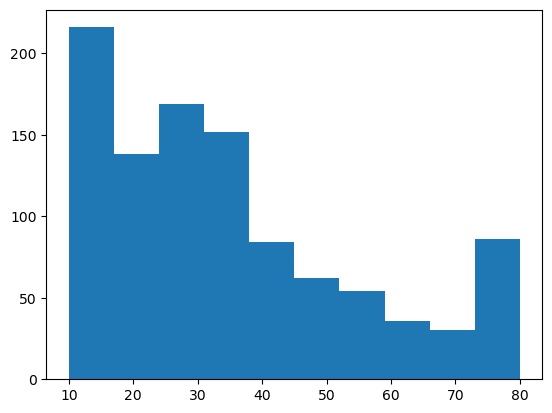

In [35]:
#最后，规范数据区间，将访问次数（access）大于80的数据设置为80。
res.loc[res.access > 80,'access'] = 80
plt.hist(res.access,bins=10)
plt.show()

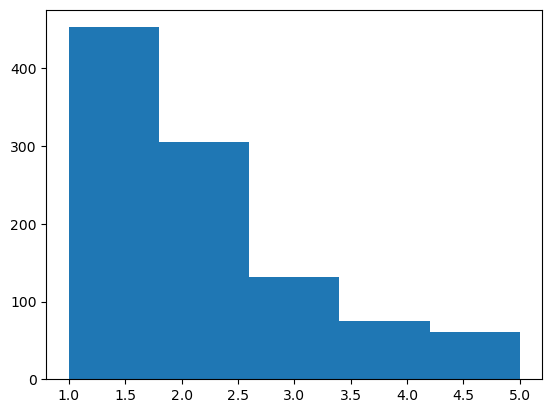

In [36]:
#采用最小-最大标准化方法进行访问次数（access）数据标准化，
# 将访问次数映(access)射为1-5之间的评分(rank)。
def min_max_scale(data,new_min,new_max):
    new = ((data - data.min()) / (data.max() - data.min())) * (new_max - new_min) + new_min
    return new
res.access = min_max_scale(res.access,1,5)
res.access = res.access.apply(lambda x:int(x))
res
plt.hist(res.access,bins=5)
plt.show()

In [37]:
'''
    采用标准差标准化方法进行访问次数（access）数据标准化

'''
def test(data):
    new1 = (data - data.mean()) / data.std()
    return new1
res['access1'] = test(res['access'])
res

,user_id,car_msg,access,access1
0,4510001121,吉利-博越,1,-0.855787
1,4510001121,吉利-星瑞,2,-0.009884
2,4510001121,吉利-星越L,1,-0.855787
3,4510001121,哈弗-H6,1,-0.855787
4,4510001121,哈弗-大狗,1,-0.855787
...,...,...,...,...
1022,5064573426,比亚迪-驱逐舰05,1,-0.855787
1023,5064573426,理想-理想L6,1,-0.855787
1024,5064573426,理想-理想L8,1,-0.855787
1025,5064573426,蔚来-蔚来ET5,1,-0.855787


In [38]:

def func2(data):
    k = numpy.ceil(numpy.log10(numpy.abs(data).max()))
    new4 = (data) / 10 ** k
    return new4
res['access_new'] = func2(res.access)
res

,user_id,car_msg,access,access1,access_new
0,4510001121,吉利-博越,1,-0.855787,0.1
1,4510001121,吉利-星瑞,2,-0.009884,0.2
2,4510001121,吉利-星越L,1,-0.855787,0.1
3,4510001121,哈弗-H6,1,-0.855787,0.1
4,4510001121,哈弗-大狗,1,-0.855787,0.1
...,...,...,...,...,...
1022,5064573426,比亚迪-驱逐舰05,1,-0.855787,0.1
1023,5064573426,理想-理想L6,1,-0.855787,0.1
1024,5064573426,理想-理想L8,1,-0.855787,0.1
1025,5064573426,蔚来-蔚来ET5,1,-0.855787,0.1
